In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
noniidL10E2_path_file = "./output/mnist/acc/noniid/L10E2/"
noniidL20E5_path_file = "./output/mnist/acc/noniid/L20E5/"
iidL10E2_path_file = "./output/mnist/acc/iid/L10E2/"
iidL20E5_path_file = "./output/mnist/acc/iid/L20E5/"
fl_path_file = "./output/mnist/acc/FL/"

fontsize = 20

In [27]:
#reading files

noniidL10E2_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]


noniidL20E5_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]


iidL10E2_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part20_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part30_partition_iid_nclient300.npy.weight.pth.acc.csv"
]

iidL20E5_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part10_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part20_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part30_partition_iid_nclient300.npy.weight.pth.acc.csv"
]

iid_fl_files = [
    "FL_MLP2lr0.01_dc1.0_B10_L20_G5000_partition_iid_nclient300.npy.weight.pth.acc.csv",
    "FL_MLP2lr0.01_dc1.0_B10_L100_G5000_partition_iid_nclient300.npy.weight.pth.acc.csv"
]

noniid_fl_files = [
    "FL_MLP2lr0.01_dc1.0_B10_L20_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "FL_MLP2lr0.01_dc1.0_B10_L100_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]



noniidL10E2_dfs = []
noniidL10E2_n_files = len(noniidL10E2_files)
for i in range(noniidL10E2_n_files):
    noniidL10E2_dfs.append(pd.read_csv(noniidL10E2_path_file + noniidL10E2_files[i]))

noniidL20E5_dfs = []
noniidL20E5_n_files = len(noniidL20E5_files)
for i in range(noniidL20E5_n_files):
    noniidL20E5_dfs.append(pd.read_csv(noniidL20E5_path_file + noniidL20E5_files[i]))

iidL10E2_dfs = []
iidL10E2_n_files = len(iidL10E2_files)
for i in range(iidL10E2_n_files):
    iidL10E2_dfs.append(pd.read_csv(iidL10E2_path_file + iidL10E2_files[i]))

iidL20E5_dfs = []
iidL20E5_n_files = len(iidL20E5_files)
for i in range(iidL20E5_n_files):
    iidL20E5_dfs.append(pd.read_csv(iidL20E5_path_file + iidL20E5_files[i]))

iidfl_dfs = []
iidfl_n_files = len(iid_fl_files)
for i in range(iidfl_n_files):
    iidfl_dfs.append(pd.read_csv(fl_path_file + iid_fl_files[i]))

noniidfl_dfs = []
noniidfl_n_files = len(noniid_fl_files)
for i in range(noniidfl_n_files):
    noniidfl_dfs.append(pd.read_csv(fl_path_file + noniid_fl_files[i]))



In [34]:
#setting
ylim = [80, 97]
fl_lbl = ['FL']
lbl_cluster = ["10 servers", "20 servers", "30 servers"]

line_color2 = [ 'mediumblue', 'orangered','purple']



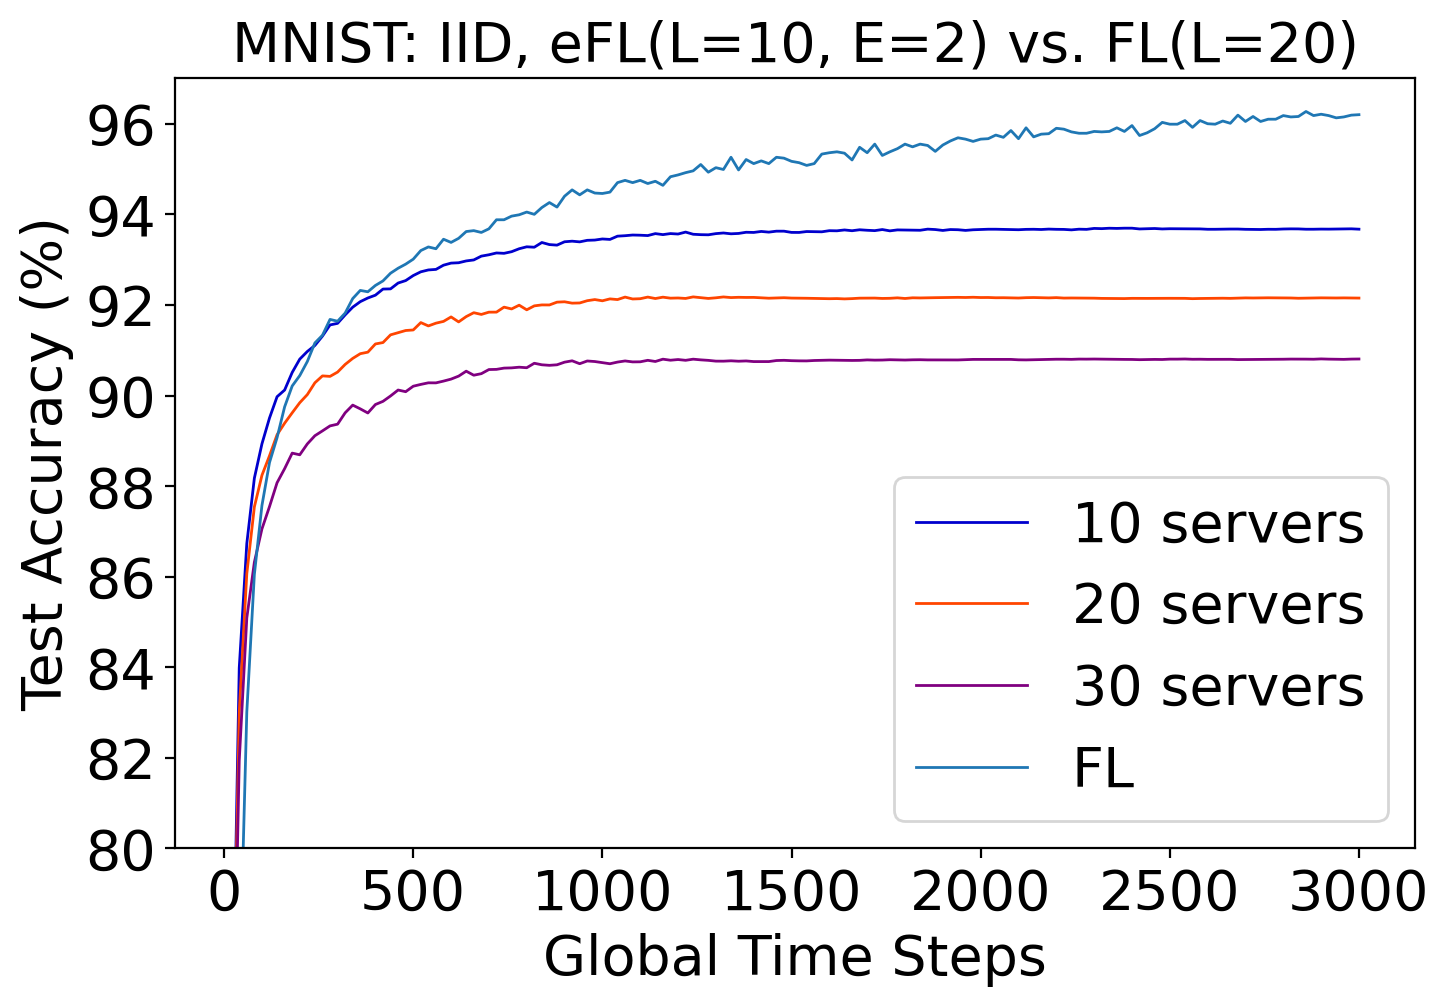

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(iidL10E2_n_files):
    df = iidL10E2_dfs[i][iidL10E2_dfs[i].global_round <= 3000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

to_plot = iidfl_dfs[0][iidfl_dfs[0].global_round <= 3000] 
ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[0], linewidth=1)

ax.set_title("MNIST: IID, eFL(L=10, E=2) vs. FL(L=20)", size=fontsize)
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
#ax.set_xticklabels(ax.get_xticklabels(), size = 15)
#ax.set_yticklabels(ax.get_yticklabels(), size = 15)
ax.legend(loc='best', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()


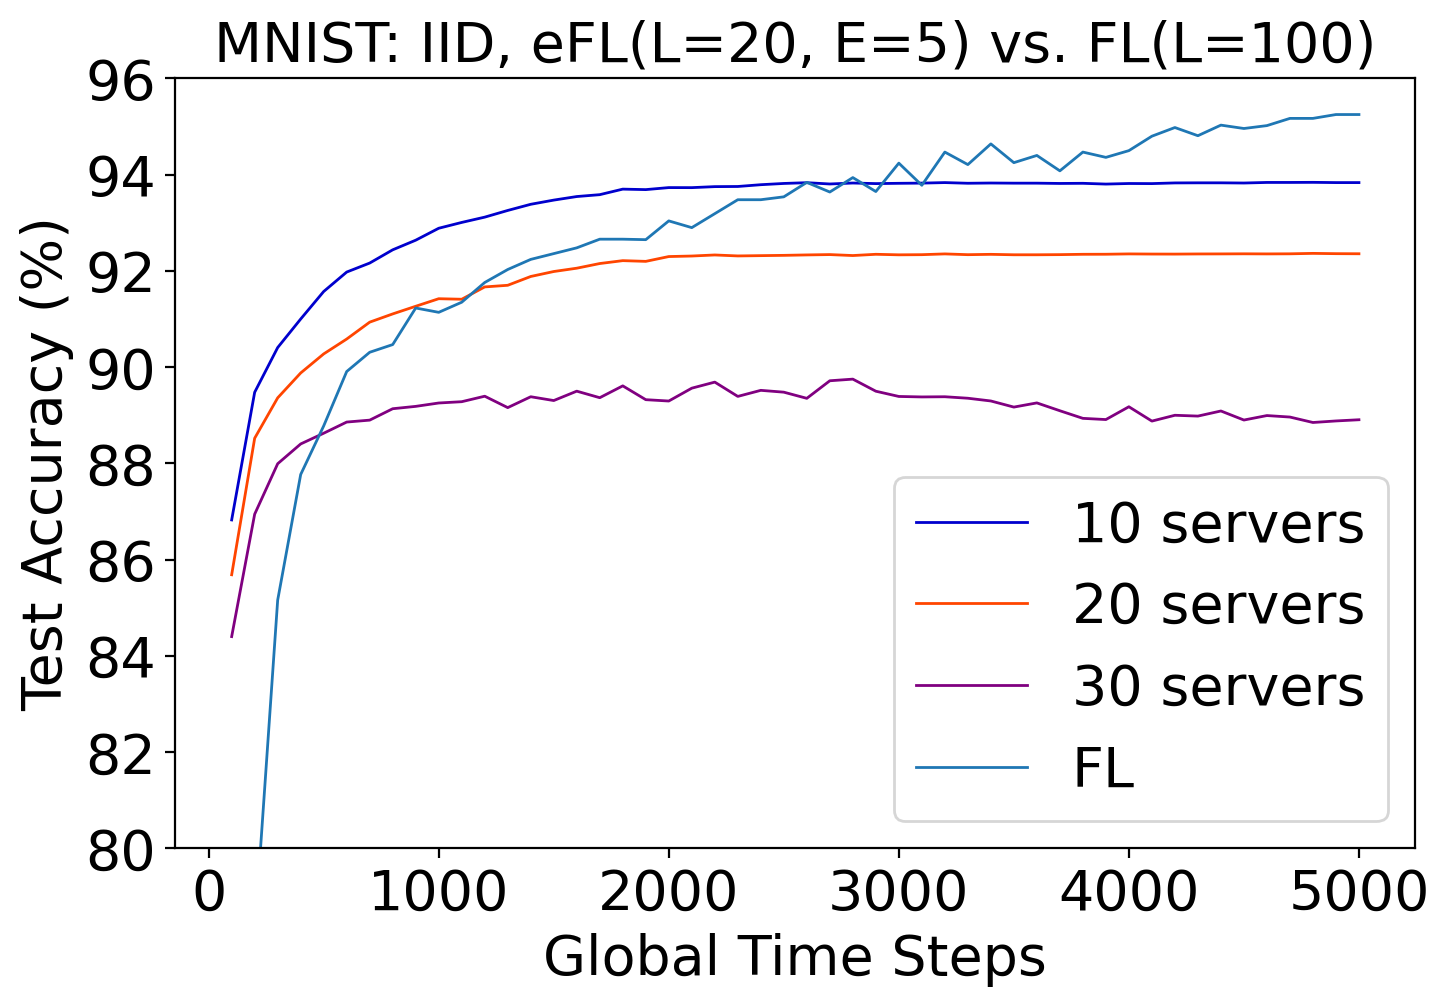

In [30]:
ylim = [80, 96]

fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(iidL20E5_n_files):
    df = iidL20E5_dfs[i][iidL20E5_dfs[i].global_round <= 5000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

to_plot = iidfl_dfs[1][iidfl_dfs[1].global_round <= 5000] 
ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[0], linewidth=1)

ax.set_title("MNIST: IID, eFL(L=20, E=5) vs. FL(L=100)", size=fontsize)
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
ax.legend(loc='lower right', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

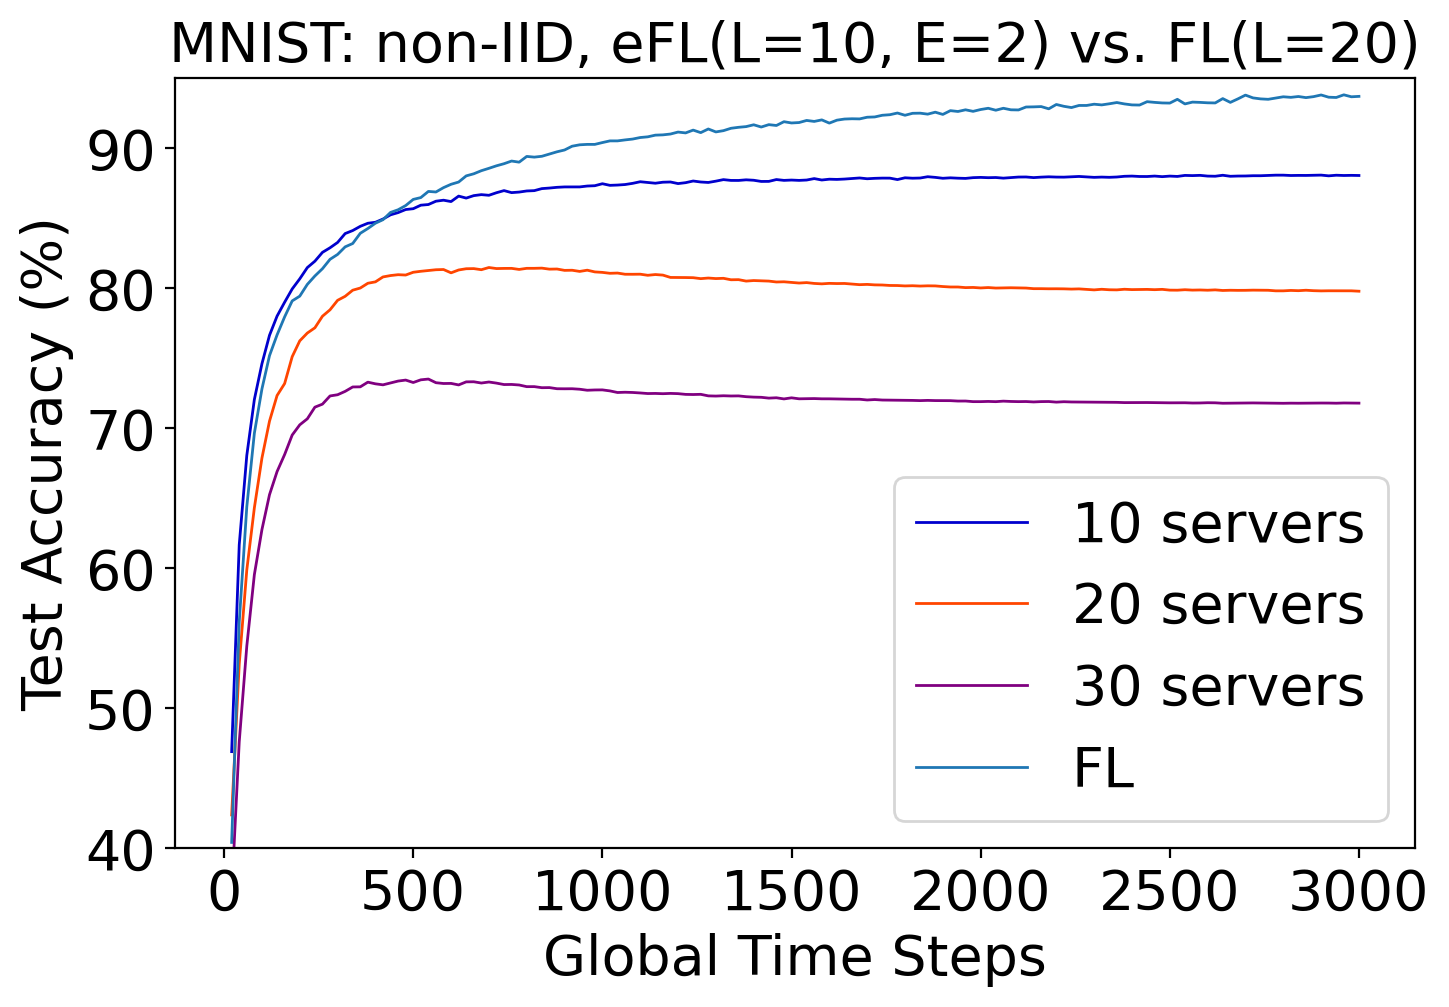

In [31]:
ylim = [40, 95]
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(noniidL10E2_n_files):
    df = noniidL10E2_dfs[i][noniidL10E2_dfs[i].global_round <= 3000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

to_plot = noniidfl_dfs[0][noniidfl_dfs[0].global_round <= 3000] 
ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[0], linewidth=1)

ax.set_title("MNIST: non-IID, eFL(L=10, E=2) vs. FL(L=20)", size=fontsize)

ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])

ax.legend(loc='best', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

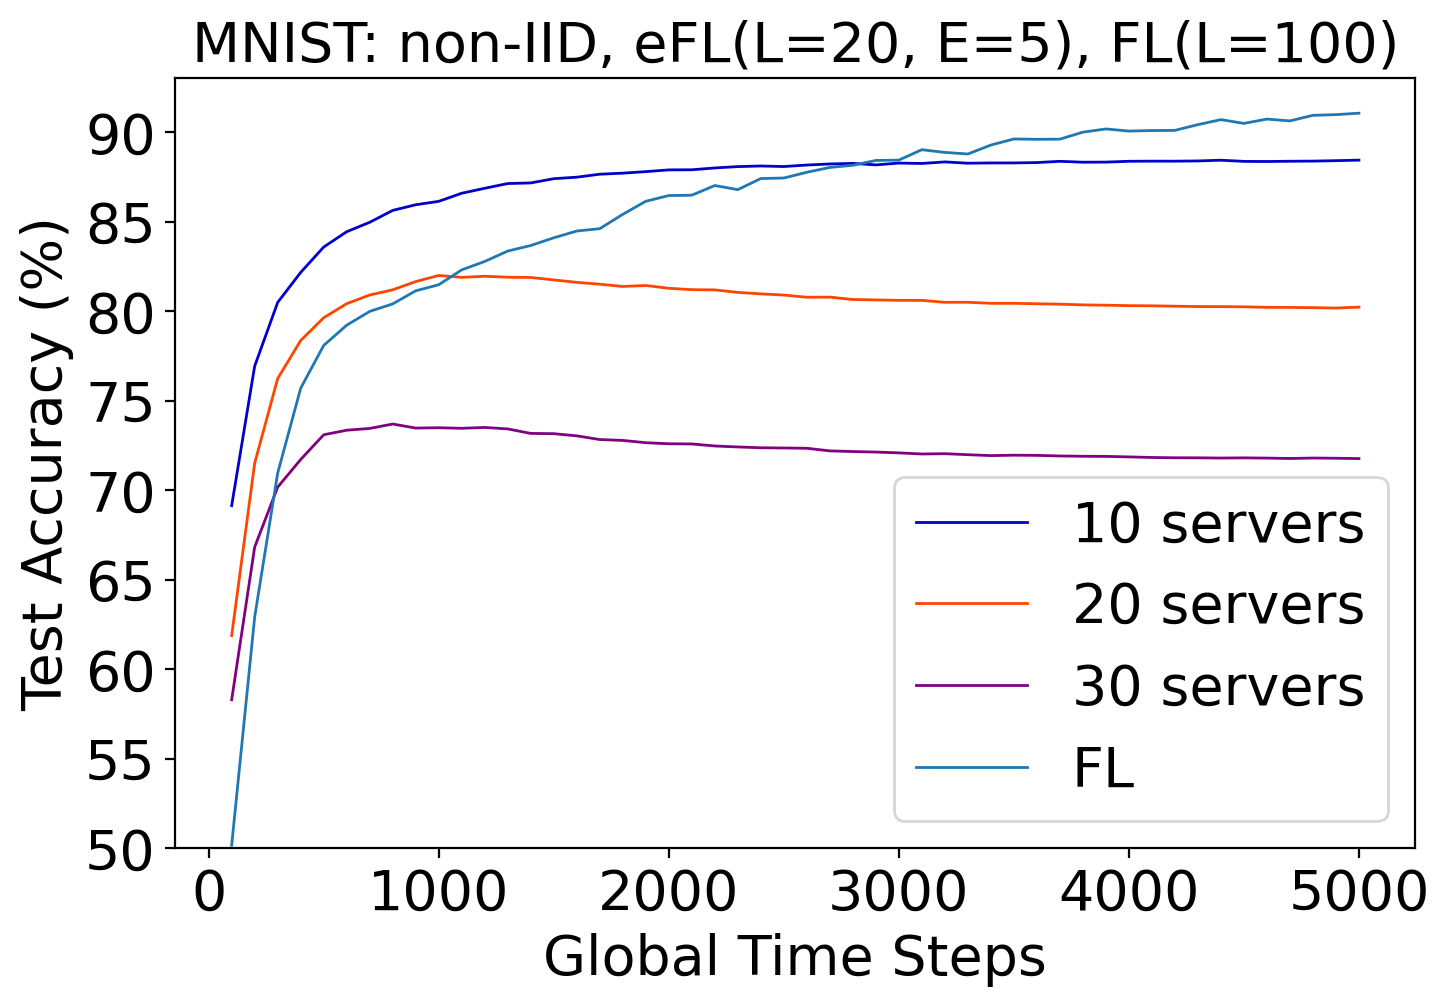

In [32]:
ylim = [50, 93]
fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(200)

for i in range(noniidL20E5_n_files):
    df = noniidL20E5_dfs[i][noniidL20E5_dfs[i].global_round <= 5000]
    ax.plot(df.global_round, df.test_acc, label = lbl_cluster[i], c = line_color2[i], linewidth = 1)

to_plot = noniidfl_dfs[1][noniidfl_dfs[1].global_round <= 5000] 
ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[0], linewidth=1)

ax.set_title("MNIST: non-IID, eFL(L=20, E=5), FL(L=100)", size=fontsize)
ax.set_ylim(ymin = ylim[0], ymax=ylim[1])
ax.set_ylabel("Test Accuracy (%)", size=fontsize)
ax.set_xlabel("Global Time Steps", size=fontsize)
ax.legend(loc='best', fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()